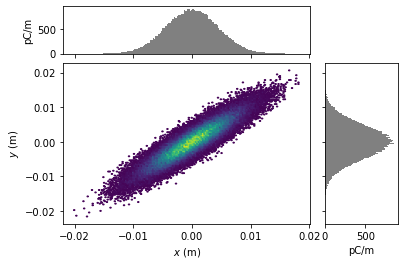

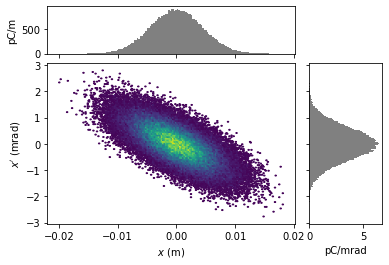

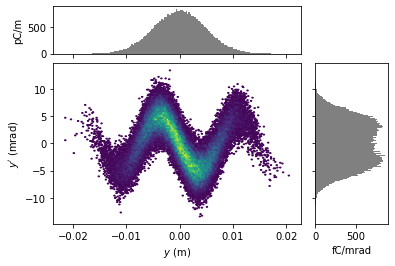

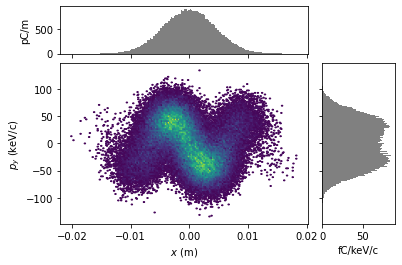

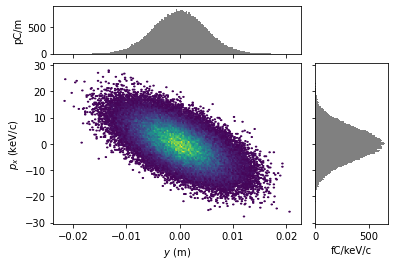

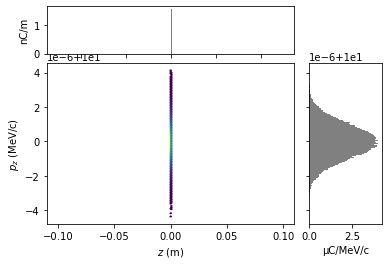

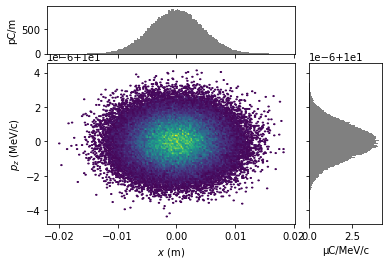

In [33]:
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from distgen import Generator

# create beam
from distgen.physical_constants import unit_registry as unit

# add a transformation to gen
setstdx = {"type": "set_std x", "sigma_x": {"value": 2, "units": "mm"}}
setstdpx = {"type": "set_std px", "sigma_px": {"value": 0.01, "units": "MeV/c"}}
k = 2 * 3.14 / (15 * unit("mm"))
ycos = {
    "type": "cosine x:y",
    "amplitude": {"value": 30, "units": "mm"},
    "omega": {"value": k.magnitude, "units": str(k.units)},
    "phase": {"value": 90, "units": "deg"},
}

pycos = {
    "type": "cosine y:py",
    "amplitude": {"value": 0.05, "units": "MeV/c"},
    "omega": {"value": k.magnitude, "units": str(k.units)},
    "phase": {"value": 90, "units": "deg"},
}

linear_energy = {
    "type": "polynomial x:pz",
    "coefficients":[
        {"value": 0.0, "units": "MeV/c"},
        {"value": 0.0, "units": "MeV/c/meter"}
    ]
}

linear_position = {
    "type": "polynomial x:y",
    "coefficients":[
        {"value": 0.0, "units": "m"},
        {"value": 1.0, "units": ""}
    ]
}

gen = Generator("test_case//gaussian.yaml")

gen.input["transforms"] = {
    "t1": linear_energy,
    "order": ["t1"]
}

twiss_x = {
    "type": "set_twiss x",
    "beta": {
        "value": 10,
        "units": "m",
    },
    "alpha": {"value": 1, "units": ""},
    "emittance": {"value": 2.0, "units": "um"},
}

gen.input["transforms"] = {
    "twiss": twiss_x,
    "pycos": pycos,
    "linear_energy": linear_energy,
    "linear_position": linear_position,
    "order": ["twiss","linear_energy", "linear_position","pycos"],
}
gen.run()
particles_3 = gen.particles

particles = particles_3

particles.plot("x", "y")
particles.plot("x", "xp")
particles.plot("y", "yp")
particles.plot("x", "py")
particles.plot("y", "px")
particles.plot("z", "pz")
particles.plot("x", "pz")